# Orlando - Clissificação Binária - Brest Cancer - Classificar um registro

- Base de dados: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


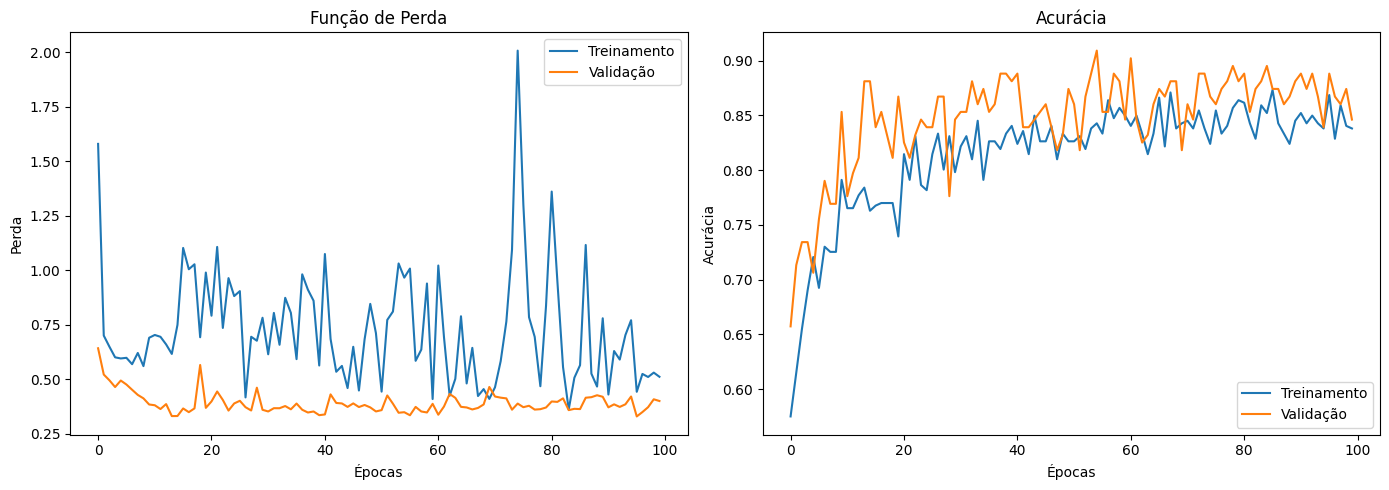

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

 Acurácia final no teste: 0.8462


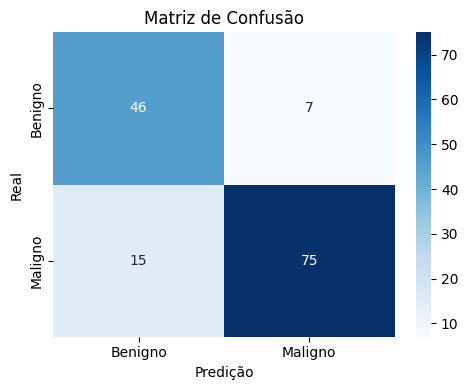


📋 Relatório de Classificação:
              precision    recall  f1-score   support

     Benigno       0.75      0.87      0.81        53
     Maligno       0.91      0.83      0.87        90

    accuracy                           0.85       143
   macro avg       0.83      0.85      0.84       143
weighted avg       0.86      0.85      0.85       143

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

 Resultado para novo paciente:
🔴 Maligno (probabilidade: 100.00%)


C:\Users\CLIENTE\AppData\Local\Temp\ipykernel_15220\2353646178.py:120: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("🔴 Maligno (probabilidade: {:.2f}%)".format(float(previsao_novo)*100))


In [3]:
# ---------------------------
# 1. Bibliotecas necessárias
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam

# ---------------------------
# 2. Carregamento dos dados
# ---------------------------
X = pd.read_csv(r'C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classificação binária\entradas_breast.csv')
y = pd.read_csv(r'C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classificação binária\saidas_breast.csv')

# ---------------------------
# 3. Divisão treino e teste
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# ---------------------------
# 4. Construção da rede neural
# ---------------------------
modelo = Sequential()
modelo.add(InputLayer(input_shape=(X.shape[1],)))
modelo.add(Dense(16, activation='relu', kernel_initializer='random_uniform'))
modelo.add(Dropout(0.2))
modelo.add(Dense(16, activation='relu', kernel_initializer='random_uniform'))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation='sigmoid'))

# Compilação do modelo
modelo.compile(optimizer=Adam(learning_rate=0.001, clipvalue=0.5),
               loss='binary_crossentropy',
               metrics=['binary_accuracy'])

# ---------------------------
# 5. Treinamento do modelo
# ---------------------------
historico = modelo.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=100,
                       batch_size=10,
                       verbose=0)

# ---------------------------
# 6. Visualização: Gráficos
# ---------------------------
plt.figure(figsize=(14, 5))

# Gráfico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(historico.history['loss'], label='Treinamento')
plt.plot(historico.history['val_loss'], label='Validação')
plt.title('Função de Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico da acurácia
plt.subplot(1, 2, 2)
plt.plot(historico.history['binary_accuracy'], label='Treinamento')
plt.plot(historico.history['val_binary_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------
# 7. Avaliação no conjunto de teste
# ---------------------------
previsoes = modelo.predict(X_test)
previsoes_binarias = (previsoes > 0.5)

# Acurácia
acc = accuracy_score(y_test, previsoes_binarias)
print(f"\n Acurácia final no teste: {acc:.4f}")

# ---------------------------
# 8. Matriz de Confusão
# ---------------------------
cm = confusion_matrix(y_test, previsoes_binarias)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

# ---------------------------
# 9. Relatório de Classificação
# ---------------------------
print("\n📋 Relatório de Classificação:")
print(classification_report(y_test, previsoes_binarias, target_names=['Benigno', 'Maligno']))

# ---------------------------
# 10. Previsão de novo paciente
# ---------------------------
novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178, 0.20,
                  0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015, 0.03,
                  0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185, 0.84, 158, 0.363]])

previsao_novo = modelo.predict(novo)

print("\n Resultado para novo paciente:")
if previsao_novo > 0.5:
    print("🔴 Maligno (probabilidade: {:.2f}%)".format(float(previsao_novo)*100))
else:
    print("🟢 Benigno (probabilidade: {:.2f}%)".format((1 - float(previsao_novo))*100))


### Considerações:

Os resultados obtidos com a aplicação da rede neural para a classificação binária de nódulos mamários demonstram um desempenho satisfatório, com acurácia final de aproximadamente 84,62% no conjunto de teste. Tal valor indica que o modelo é capaz de realizar a tarefa com um bom grau de confiabilidade, considerando o equilíbrio entre sensibilidade e especificidade. No entanto, uma análise mais detalhada das métricas individuais e da matriz de confusão revela nuances importantes sobre o comportamento do classificador.

A matriz de confusão mostra que, dos 53 casos benignos presentes no conjunto de teste, 46 foram corretamente classificados como benignos, enquanto 7 foram incorretamente rotulados como malignos (falsos positivos). Por outro lado, dos 90 casos malignos, 75 foram identificados corretamente, enquanto 15 foram erroneamente classificados como benignos (falsos negativos). Este último tipo de erro é particularmente relevante no contexto clínico, pois representa a falha em detectar a presença de uma condição grave, podendo comprometer o tratamento precoce. Portanto, embora o modelo apresente bons resultados gerais, a taxa de falsos negativos ainda demanda atenção, especialmente em aplicações sensíveis à saúde humana.

No relatório de classificação, observa-se que a classe “maligno” apresenta uma precisão de 0,91, indicando que a maioria das predições de malignidade estavam corretas. No entanto, o recall para essa mesma classe foi de 0,83, evidenciando que 17% dos casos malignos não foram detectados. Em contrapartida, a classe “benigno” apresentou precisão de 0,75 e recall de 0,87, revelando que o modelo tende a classificar corretamente a maioria dos casos benignos, ainda que com maior propensão a gerar falsos positivos. O F1-score ponderado, que considera o suporte de cada classe, foi de 0,85, confirmando um bom equilíbrio geral entre precisão e recall.

Diante disso, o desempenho apresentado pode ser considerado bastante robusto para uma primeira abordagem, especialmente em tarefas de classificação médica. Ainda assim, há espaço para melhorias. Estratégias como ajuste do limiar de decisão da função sigmoide, reponderação das classes no processo de treinamento (via class weights), ou técnicas de balanceamento do conjunto de dados, como o uso de oversampling (ex. SMOTE), podem ser empregadas com o objetivo de reduzir a taxa de falsos negativos e melhorar a sensibilidade do modelo. Além disso, a adoção de validação cruzada com múltiplos folds poderia tornar a avaliação mais confiável e representativa. Essas medidas são especialmente importantes em cenários médicos, nos quais a precisão diagnóstica está diretamente associada à qualidade de vida dos pacientes.
